In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression

In [2]:
# Load the dataset (update with your file path)
data = pd.read_csv('Day_15_Healthcare_Data.csv')
data

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Diabetes,Heart_Disease
0,1,69,Male,95.0,122.0,No,No
1,2,32,Male,129.0,191.0,No,No
2,3,89,Female,101.0,214.0,No,No
3,4,78,Female,142.0,203.0,No,No
4,5,38,Male,160.0,217.0,No,No
...,...,...,...,...,...,...,...
500,47,25,Male,106.0,148.0,No,No
501,145,26,Male,128.0,116.0,No,No
502,213,86,Male,98.0,159.0,No,No
503,303,43,Male,171.0,243.0,No,No


In [3]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Patient_ID  Age  Gender  Blood_Pressure  Cholesterol Diabetes Heart_Disease
0           1   69    Male            95.0        122.0       No            No
1           2   32    Male           129.0        191.0       No            No
2           3   89  Female           101.0        214.0       No            No
3           4   78  Female           142.0        203.0       No            No
4           5   38    Male           160.0        217.0       No            No


In [4]:
# Get summary information about the dataset, including data types and missing values count
print("\nDataset Information:")
print(data.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      505 non-null    int64  
 1   Age             505 non-null    int64  
 2   Gender          484 non-null    object 
 3   Blood_Pressure  475 non-null    float64
 4   Cholesterol     485 non-null    float64
 5   Diabetes        505 non-null    object 
 6   Heart_Disease   505 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 27.7+ KB
None


In [5]:
# Descriptive statistics for numerical columns (for an overall view)
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
       Patient_ID         Age  Blood_Pressure  Cholesterol
count  505.000000  505.000000      475.000000   485.000000
mean   249.693069   52.918812      133.412632   200.470103
std    144.240508   21.064700       25.933424    58.533857
min      1.000000   18.000000       90.000000   101.000000
25%    126.000000   34.000000      111.000000   149.000000
50%    249.000000   52.000000      132.000000   207.000000
75%    374.000000   71.000000      155.000000   249.000000
max    500.000000   89.000000      179.000000   299.000000


In [6]:
# --------------------------------------
# Step 2: Identify Missing Data
# --------------------------------------

# Identify missing data using isna() to check for NaNs (Not a Number)
missing_values = data.isna().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(data)) * 100

# Print the missing values count and percentage for each column
print(f"\nMissing Values Count:\n{missing_values}")
print(f"\nPercentage of Missing Values:\n{missing_percentage}")


Missing Values Count:
Patient_ID         0
Age                0
Gender            21
Blood_Pressure    30
Cholesterol       20
Diabetes           0
Heart_Disease      0
dtype: int64

Percentage of Missing Values:
Patient_ID        0.000000
Age               0.000000
Gender            4.158416
Blood_Pressure    5.940594
Cholesterol       3.960396
Diabetes          0.000000
Heart_Disease     0.000000
dtype: float64


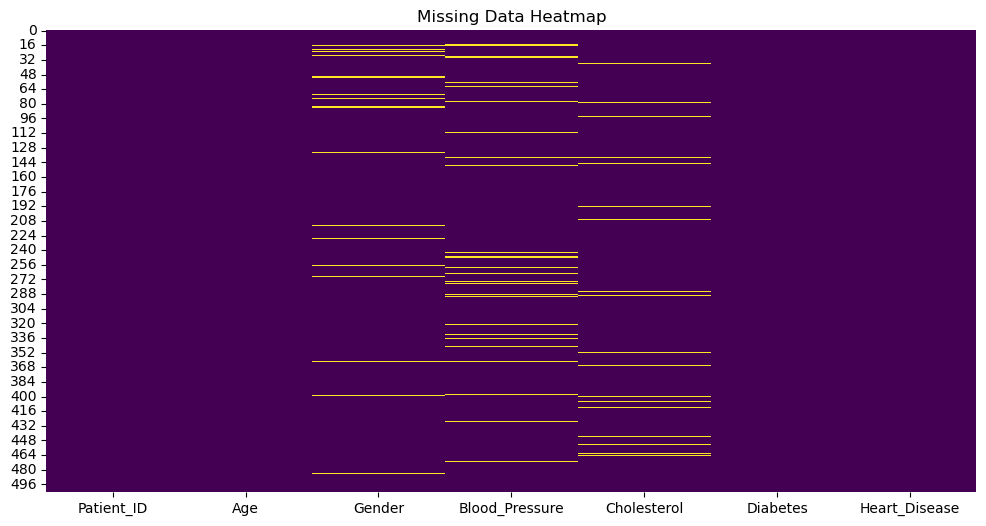

In [7]:
# --------------------------------------
# Step 3: Analyze the Pattern of Missing Data
# --------------------------------------

# Visualize the missing data pattern across all columns using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.isna(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [8]:
# --------------------------------------
# Step 4: Impute Missing Values
# --------------------------------------

# 4.1: Mean/Median Imputation for Numerical Columns
# For numerical columns, we'll use the median for imputation (robust to outliers)
# Replace missing values in 'numerical_column' with the median
data['Blood_Pressure'] = data['Blood_Pressure'].fillna(data['Blood_Pressure'].median())
data['Blood_Pressure'].isna().sum()

0

In [9]:
# 4.2: Mode Imputation for Categorical Columns
# For categorical columns, we'll replace missing values with the most frequent value (mode)
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Gender'].isna().sum()

0

In [10]:
# 4.4: Regression Imputation for Specific Columns (e.g., 'feature_2' based on 'feature_1')
# Train a linear regression model to predict missing values
# Assume 'feature_1' is related to missing values in 'feature_2'
train_data = data.dropna(subset=['Cholesterol'])
X_train = train_data[['Age']]  # Independent variable
y_train = train_data['Cholesterol']   # Dependent variable
# Create and train the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predict missing values in 'feature_2'
missing_data = data[data['Cholesterol'].isna()]
X_missing = missing_data[['Age']]
predicted_values = regression_model.predict(X_missing)
# Replace the missing values in 'feature_2' with the predicted values
data.loc[data['Cholesterol'].isna(), 'Cholesterol'] = predicted_values

In [12]:
data.isna().sum()

Patient_ID        0
Age               0
Gender            0
Blood_Pressure    0
Cholesterol       0
Diabetes          0
Heart_Disease     0
dtype: int64

In [13]:
# --------------------------------------
# Step 5: Evaluate the Effect of Imputation
# --------------------------------------

# Statistical Analysis Before Imputation (e.g., mean, standard deviation)
print("\nBefore Imputation (Mean and Standard Deviation):")
print(data.describe())


Before Imputation (Mean and Standard Deviation):
       Patient_ID         Age  Blood_Pressure  Cholesterol
count  505.000000  505.000000      505.000000   505.000000
mean   249.693069   52.918812      133.328713   200.470142
std    144.240508   21.064700       25.151976    57.360732
min      1.000000   18.000000       90.000000   101.000000
25%    126.000000   34.000000      113.000000   151.000000
50%    249.000000   52.000000      132.000000   203.000000
75%    374.000000   71.000000      153.000000   248.000000
max    500.000000   89.000000      179.000000   299.000000


In [14]:
# Statistical Analysis After Imputation
print("\nAfter Imputation (Mean and Standard Deviation):")
print(data.describe())



After Imputation (Mean and Standard Deviation):
       Patient_ID         Age  Blood_Pressure  Cholesterol
count  505.000000  505.000000      505.000000   505.000000
mean   249.693069   52.918812      133.328713   200.470142
std    144.240508   21.064700       25.151976    57.360732
min      1.000000   18.000000       90.000000   101.000000
25%    126.000000   34.000000      113.000000   151.000000
50%    249.000000   52.000000      132.000000   203.000000
75%    374.000000   71.000000      153.000000   248.000000
max    500.000000   89.000000      179.000000   299.000000


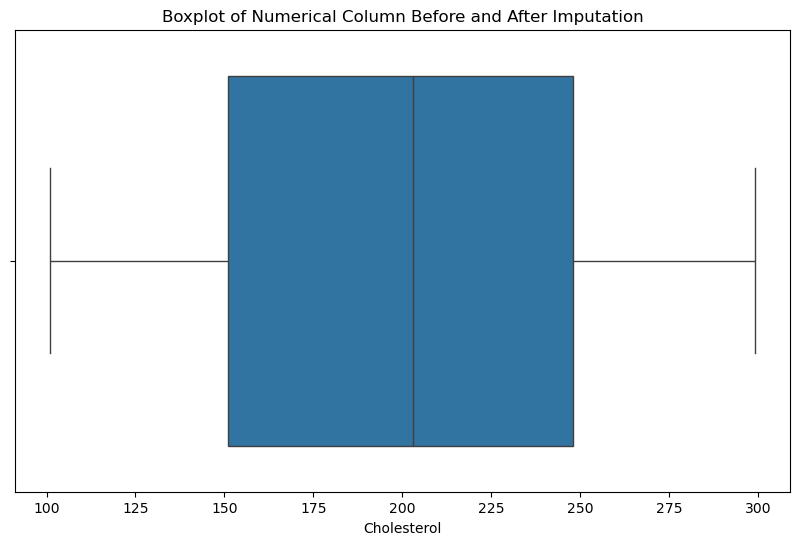

In [15]:
# Visualize the impact of imputation using boxplots for a numerical column
# Boxplot for 'numerical_column' before and after imputation
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Cholesterol')
plt.title('Boxplot of Numerical Column Before and After Imputation')
plt.show()


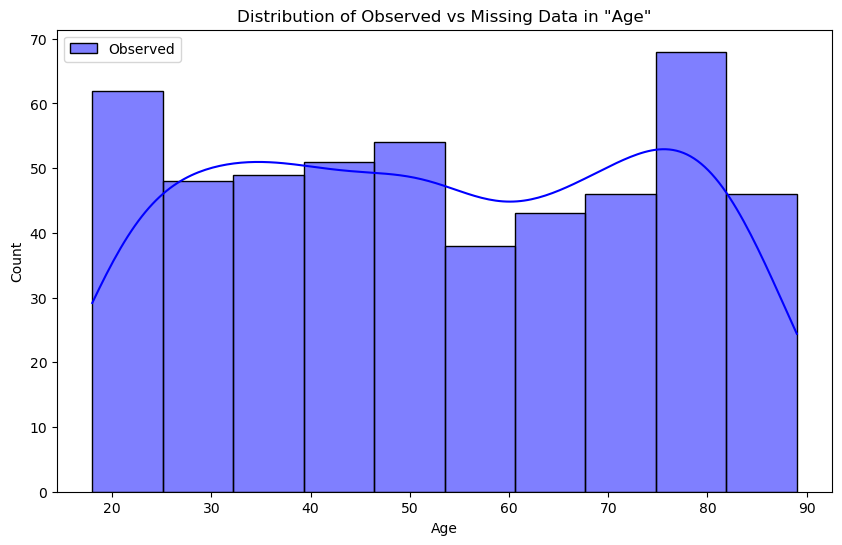

In [16]:
# Visualize missing vs observed data for a column (e.g., 'numerical_column')
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'].dropna(), kde=True, label='Observed', color='blue')
sns.histplot(data[data['Age'].isna()]['Age'], kde=True, label='Missing', color='red')
plt.legend()
plt.title('Distribution of Observed vs Missing Data in "Age"')
plt.show()

In [17]:
# --------------------------------------
# Step 6: Final Dataset Overview
# --------------------------------------

# Print the final dataset with imputed values
print("\nFinal Dataset with Imputed Values:")
print(data.head(50))

# Optional: Save the cleaned dataset to a new CSV file
data.to_csv('Day_15_Healthcare_Data.csv', index=False)


Final Dataset with Imputed Values:
    Patient_ID  Age  Gender  Blood_Pressure  Cholesterol Diabetes  \
0            1   69    Male            95.0   122.000000       No   
1            2   32    Male           129.0   191.000000       No   
2            3   89  Female           101.0   214.000000       No   
3            4   78  Female           142.0   203.000000       No   
4            5   38    Male           160.0   217.000000       No   
5            6   41  Female            99.0   104.000000       No   
6            7   20    Male           134.0   203.000000      Yes   
7            8   39  Female           106.0   207.000000       No   
8            9   70    Male           115.0   164.000000      Yes   
9           10   19    Male           174.0   220.000000       No   
10          11   47    Male           151.0   129.000000       No   
11          12   55    Male           135.0   248.000000       No   
12          13   19    Male           153.0   183.000000       No  